In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

- **amount_tsh** - Total static head (amount water available to waterpoint)
- **date_recorded** - The date the row was entered
- **funder** - Who funded the well
- **gps_height** - Altitude of the well
- **installer** - Organization that installed the well
- **longitude** - GPS coordinate
- **latitude** - GPS coordinate
- **wpt_name** - Name of the waterpoint if there is one
- **num_private**
- **basin** - Geographic water basin
- **subvillage** - Geographic location
- **region** - Geographic location
- **region_code** - Geographic location (coded)
- **district_code** - Geographic location (coded)
- **lga** - Geographic location
- **ward** - Geographic location
- **population** - Population around the well
- **public_meeting** - True/False
- **recorded_by** - Group entering this row of data
- **scheme_management** - Who operates the waterpoint
- **scheme_name** - Who operates the waterpoint
- **permit** - If the waterpoint is permitted
- **construction_year** - Year the waterpoint was constructed
- **extraction_type** - The kind of extraction the waterpoint uses
- **extraction_type_group** - The kind of extraction the waterpoint uses
- **extraction_type_class** - The kind of extraction the waterpoint uses
- **management** - How the waterpoint is managed
- **management**_group - How the waterpoint is managed
- **payment** - What the water costs
- **payment_type** - What the water costs
- **water_quality** - The quality of the water
- **quality_group** - The quality of the water
- **quantity** - The quantity of water
- **quantity_group** - The quantity of water
- **source** - The source of the water
- **source_type** - The source of the water
- **source_class** - The source of the water
- **waterpoint_type** - The kind of waterpoint
- **waterpoint_type_group** - The kind of waterpoint

## Import Data

In [125]:
training_label = pd.read_csv("data/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv")
training_values = pd.read_csv("data/4910797b-ee55-40a7-8668-10efd5c1b960.csv")
test = pd.read_csv("data/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv")

train = training_values.merge(training_label, on = 'id')

test['status_group'] = '*unknown*'

print("{} observations in train\n{} observations the test\n{} in total".format(len(train), len(test), len(train) + len(test)))

59400 observations in train
14850 observations the test
74250 in total


In [118]:
dataset = train.append(test)
dataset.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## Data Exploration

In [7]:
dataset.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [6]:
dataset["status_group"].value_counts()

functional                 32259
non functional             22824
*unknown*                  14850
functional needs repair     4317
Name: status_group, dtype: int64

In [618]:
dataset.dtypes

id                       category
amount_tsh                float64
date_recorded            category
funder                   category
gps_height               category
installer                category
longitude                category
latitude                 category
wpt_name                 category
num_private                 int64
basin                    category
subvillage               category
region                   category
region_code              category
district_code            category
lga                      category
ward                     category
population                  int64
public_meeting           category
recorded_by              category
scheme_management        category
scheme_name              category
permit                   category
construction_year        category
extraction_type          category
extraction_type_group    category
extraction_type_class    category
management               category
management_group         category
payment       

In [245]:
for col in dataset:
    if dataset.dtypes[col].name == 'object':
        dataset[col] = dataset[col].astype('category')

other_categoricals = ['id', 'district_code', 'construction_year', 'region_code',
                      'gps_height', 'longitude', 'latitude']

dataset[other_categoricals] = dataset[other_categoricals].astype('category')

In [249]:
count = 0
for col in dataset.columns.difference(['id', 'date_recorded', 'status_group',
                                       'gps_height', 'longitude', 'latitude']):
    if dataset.dtypes[col].name == 'category':
        count = count + 1
        with pd.option_context('display.max_rows', None):
            print(dataset[col].value_counts(), '\n')

##many 0's for construction_year
## many '0' funders
## many '0' installer
## 1 'none' schema_management

Lake Victoria              12871
Pangani                    11143
Rufiji                      9987
Internal                    9642
Lake Tanganyika             8052
Wami / Ruvu                 7577
Lake Nyasa                  6332
Ruvuma / Southern Coast     5587
Lake Rukwa                  3059
Name: basin, dtype: int64 

0       25969
2010     3314
2008     3243
2009     3196
2000     2578
2007     1960
2006     1892
2011     1591
2003     1579
2004     1417
2012     1347
2002     1343
1995     1283
2005     1275
1978     1267
1999     1222
1998     1190
1985     1177
1990     1176
1996     1020
1980     1005
1984      970
1994      940
1982      926
1972      892
1997      821
1974      814
1992      807
1993      745
2001      680
1988      657
1983      594
1975      561
1986      553
1976      525
1970      493
1991      407
1989      396
1987      370
1981      291
1977      247
1979      245
1973      227
2013      209
1971      177
1960      124
1963      107
1967      106
196

Shuleni                           646
Majengo                           631
Madukani                          629
Kati                              467
Mtakuja                           322
Sokoni                            294
M                                 243
Muungano                          215
Mbuyuni                           210
Songambele                        194
Mlimani                           190
Miembeni                          168
Msikitini                         164
1                                 157
Kanisani                          146
Kibaoni                           143
Mjini                             131
Mjimwema                          129
Mapinduzi                         126
Mkwajuni                          125
Mwenge                            125
I                                 124
Bondeni                           121
Azimio                            116
Amani                             115
Mabatini                          114
Mbugani     

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [250]:
print('{} of {} categorical variables displayed.'.format(count, sum(dataset.dtypes == 'category')))

32 of 38 categorical variables displayed.


In [146]:
dataset.isna().sum()[dataset.isna().sum().ne(0)]

funder                4504
installer             4532
subvillage             470
public_meeting        4155
scheme_management     4846
scheme_name          35258
permit                3793
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a44ddd450>,
      dtype=object)

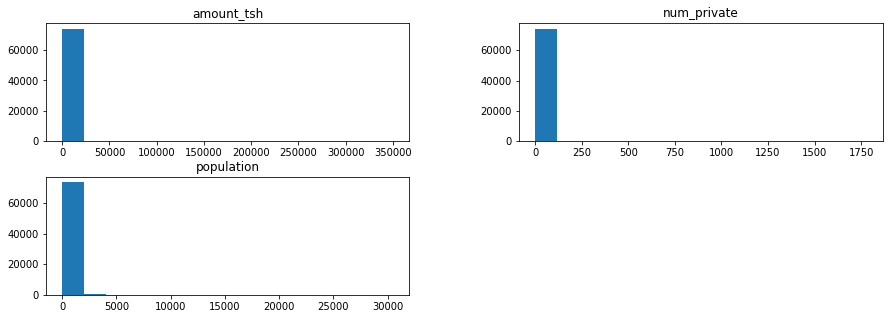

In [319]:
dataset.hist(bins = 15, figsize = (15,5), grid = False)

Text(0.5, 1.0, 'population')

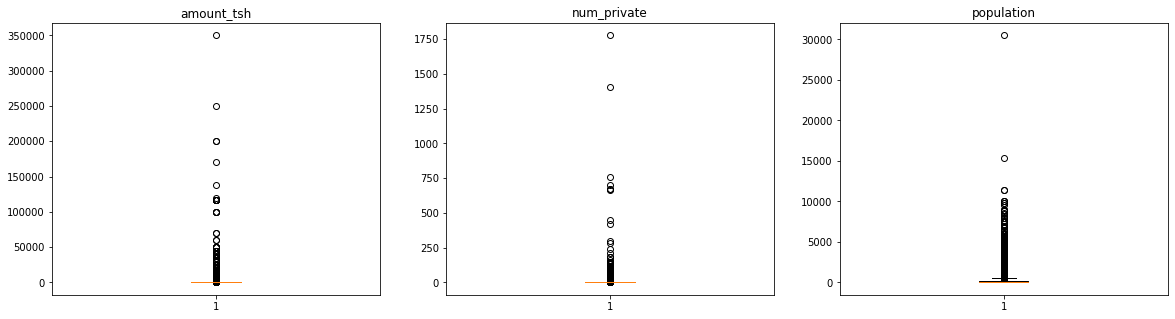

In [310]:
fig, axs = plt.subplots(1, 3, figsize = (20, 5))

axs[0].boxplot(dataset['amount_tsh'])
axs[0].set_title('amount_tsh')
axs[1].boxplot(dataset['num_private'])
axs[1].set_title('num_private')
axs[2].boxplot(dataset['population'])
axs[2].set_title('population')

In [309]:
print('mode\t', ' ' * 4, '{}'.format(dataset['amount_tsh'].mode().values[0]))
print(dataset['amount_tsh'].describe(), '\n')

print('mode\t', ' ' * 3, '{}'.format(float(dataset['num_private'].mode().values[0])))
print(dataset['num_private'].describe(), '\n')

print('mode\t', ' ' * 3, '{}'.format(float(dataset['population'].mode().values[0])))
print(dataset['population'].describe())

mode	      0.0
count     74250.000000
mean        318.685704
std        2906.762364
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64 

mode	     0.0
count    74250.000000
mean         0.462330
std         11.537879
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64 

mode	     0.0
count    74250.000000
mean       180.750828
std        471.086120
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64


## Data Cleaning


We must fill missing values, standardize numeric columns and treat outliers. To fill missing values, we will cluster using k-means and fill the missing values with the mode within each cluster.

### Binning numeric columns

0       28
1      471
2     1332
3     1812
4     1484
5     3103
6     4046
7     3993
8     2767
9     1717
10    1140
11     235
12      30
13      43
Name: bin_amount_tsh, dtype: int64


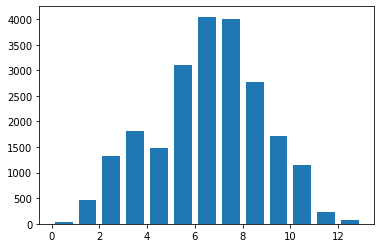

In [588]:
bat_bins = [0, 3, 5, 15, 20, 45, 50, 300, 500, 1500, 3000, 8000, 20000, 30000, np.inf]
bat_labels = list(range(len(bat_bins) - 1))

dataset['bin_amount_tsh'] = pd.cut(dataset['amount_tsh'],
                                  bins = bat_bins, 
                                  labels = bat_labels)

plt.hist(dataset["bin_amount_tsh"], bins = bat_labels, rwidth = 0.75)
print(dataset["bin_amount_tsh"].value_counts().sort_index())

0      94
1      69
2      90
3      92
4      98
5     127
6     135
7      88
8      54
9      67
10     24
11     13
Name: bin_num_private, dtype: int64


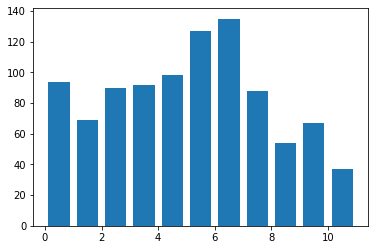

In [544]:
bnp_bins = [0, 1, 3, 5, 6, 10, 20, 40, 50, 80, 110, 200, np.inf]
bnp_labels = list(range(len(bnp_bins) - 1))

dataset['bin_num_private'] = pd.cut(dataset['num_private'],
                                  bins = bnp_bins, 
                                  labels = bnp_labels)

plt.hist(dataset["bin_num_private"], bins = bnp_labels, rwidth = 0.75)
print(dataset["bin_num_private"].value_counts().sort_index())

0     8782
1    11103
2    12316
3     9413
4     4003
5     1799
Name: bin_population, dtype: int64


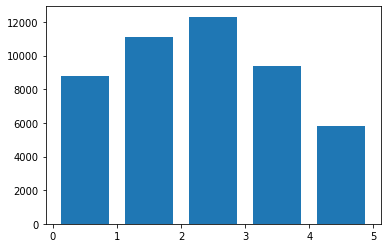

In [617]:
bp_bins = [0, 1, 100, 250, 500, 1000, np.inf]
bp_labels = list(range(len(bp_bins) - 1))

dataset['bin_population'] = pd.cut(dataset['population'],
                                  bins = bp_bins, 
                                  labels = bp_labels)

plt.hist(dataset["bin_population"], bins = bp_labels, rwidth = 0.75)
print(dataset["bin_population"].value_counts().sort_index())

### Standardizing Numeric Variables

### OneHotEncoding 

In [625]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

categorical_cols = dataset.columns[dataset.dtypes=='category'].tolist()
categorical_cols.remove('id')
categorical_cols.remove('status_group')

categorical_cols

['date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'bin_amount_tsh',
 'bin_num_private',
 'bin_population']

### Treating outliers

In [ ]:
def treat_outliers(df, col_name, treatment = "remove", whisker_range = 1.5, lower_quantile = 0.25, upper_quantile = 0.75):
    q1 = df[col_name].quantile(lower_quantile)
    q3 = df[col_name].quantile(upper_quantile)
    iqr = q3 - q1
    fence_low  = q1 - whisker_range * iqr
    fence_high = q3 + whisker_range * iqr
    above = sum(df[col_name] > fence_high)
    below = sum(df[col_name] < fence_low)
    starting_length = len(df)
    
    if treatment == "remove":
        df.drop(df[df[col_name] < fence_low].index, inplace=True)
        df.drop(df[df[col_name] > fence_high].index, inplace=True)
        ending_length = len(df)
        if below + above > 0:
            print("{} outliers removed from {}".format(starting_length - ending_length, col_name))
    
    elif treatment == "clip_all":
        df[col_name] = df[col_name].mask(df[col_name] > fence_high, fence_high)
        df[col_name] = df[col_name].mask(df[col_name] < fence_low, fence_low)
        if above > 0:
            print("{} values in {} clipped to {}".format(above, col_name, fence_high))
        if below > 0:
            print("{} values in {} clipped to {}".format(below, col_name, fence_low))
    
    elif treatment == "clip_lower":
        df[col_name] = df[col_name].mask(df[col_name] < fence_low, fence_low)
        if below > 0:
                print("{} values in {} clipped to {}".format(below, col_name, fence_low))
        
    elif treatment == "clip_upper":
        df[col_name] = df[col_name].mask(df[col_name] > fence_high, fence_high)
        if above > 0:
                print("{} values in {} clipped to {}".format(above, col_name, fence_high))
    
    else:
        print("error: pass valid technique to 'treatment'")

### Clustering with K-Means

Prior to clustering, we need to remove the test set in order to avoid having it influence the results. We will also remove the columns we wish not to be included in the clustering process. These include the "id" column, the target column and all columns with missing values.

In [219]:
non_clustering_columns = list(dataset.isna().sum()[dataset.isna().sum().ne(0)].index)
non_clustering_columns.extend(['id', 'status_group'])

train_set = dataset.iloc[:59400,:].loc[:,dataset.columns.difference(non_clustering_columns)]

59400


In [224]:
from sklearn.cluster import KMeans

x = train_set.values
k = 5

kmeans = KMeans(k)
fit = kmeans.fit_predict(x)
print(fit)

ValueError: could not convert string to float: 'Kwa Mzee Lugawa'